# Import and process the data

In [3]:
# import libraries
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler
# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
X = iris.data.features
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = iris.data.targets

In [4]:
y["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
y = y.copy()
y["class"] = y["class"].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
y

/tmp/ipython-input-497275139.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y["class"] = y["class"].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})


,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [6]:
df = X.copy()
df["species"] = y

# Exploratory Data Analysis
---

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal length,sepal width,petal length,petal width,species
sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [8]:
# Convert data into tensors

# convert to a pytorch tensor
data = torch.tensor(X.values).float()
labels = torch.tensor(y.values).float()
labels = labels.view(-1, 1)
labels.shape

torch.Size([150, 1])

In [9]:
labels=labels.squeeze().long()

# Create the ANN model

In [10]:
# model architecture
ANN_model = nn.Sequential(
    nn.Linear(4,64),   # input layer
    nn.ReLU(),         # activation
    nn.Linear(64,64),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(64,64),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(64,3),   # output layer
      )

# loss function
lossfunc = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANN_model.parameters(),lr=.01)

# Train the model

In [11]:
epochs = 1000

# initialize losses
losses = torch.zeros(epochs)
Acc = []

# loop over epochs
for i in range(epochs):

  # forward pass
  pred = ANN_model(data)

  # compute loss
  loss = lossfunc(pred,labels)
  losses[i] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(pred,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100
  Acc.append( accuracyPct )              # add to list of accuracies



# final forward pass
predictions = ANN_model(data)

predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

In [12]:
pred

tensor([[ 2.8401, -0.1696, -2.8515],
        [ 2.5927, -0.1195, -2.6520],
        [ 2.7439, -0.1570, -2.7604],
        [ 2.6650, -0.1394, -2.6993],
        [ 2.8825, -0.1756, -2.8873],
        [ 2.8484, -0.1591, -2.8828],
        [ 2.7874, -0.1621, -2.8019],
        [ 2.7893, -0.1620, -2.8073],
        [ 2.5786, -0.1223, -2.6283],
        [ 2.6805, -0.1432, -2.7129],
        [ 2.8855, -0.1751, -2.8967],
        [ 2.7831, -0.1609, -2.8004],
        [ 2.6496, -0.1377, -2.6857],
        [ 2.7034, -0.1526, -2.7167],
        [ 3.0053, -0.1923, -3.0045],
        [ 3.0457, -0.1960, -3.0460],
        [ 2.9278, -0.1796, -2.9394],
        [ 2.8093, -0.1632, -2.8298],
        [ 2.8059, -0.1499, -2.8508],
        [ 2.9186, -0.1796, -2.9253],
        [ 2.7133, -0.1391, -2.7620],
        [ 2.8460, -0.1662, -2.8676],
        [ 2.9191, -0.1837, -2.9111],
        [ 2.4418, -0.0460, -2.5684],
        [ 2.7336, -0.1490, -2.7659],
        [ 2.5212, -0.0946, -2.6062],
        [ 2.6767, -0.1280, -2.7358],
 

In [13]:
torch.argmax(pred,axis=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
        2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

# Visualize the results

Final accuracy: 94%


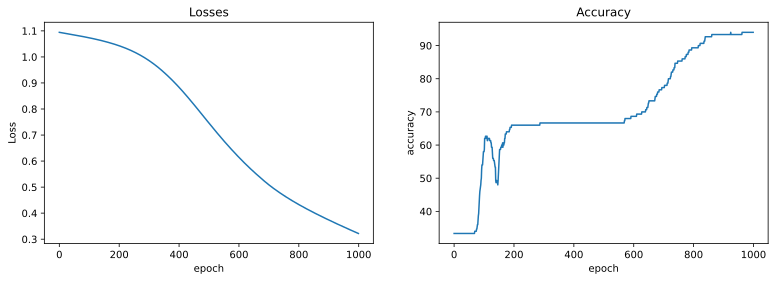

In [14]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(Acc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

In [15]:
# confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)
torch.sum(sm(pred),axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

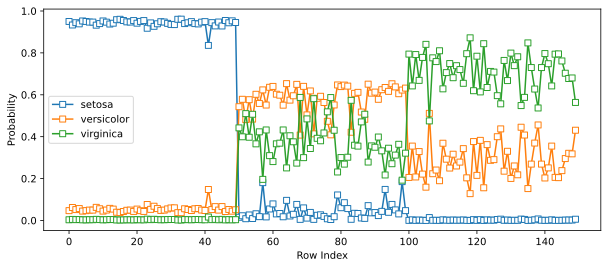

In [16]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(sm(pred.detach()),'s-',markerfacecolor='w')
plt.xlabel('Row Index')
plt.ylabel('Probability')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

# Experiments
---

1. Decrease the number of hidden layers to 1 and compare the result with that of the original architecture.
2. Decrease the number of hidden layers to 1 but increase the number of hidden units from 16 to 32 and compare the result with that of the original architecture.
3. Increase the number of hidden layers to 4 and compare the result with that of the original architecture.
4. Increase the number of hidden layers to 4 but increase the number of hidden units from 16 to 32 and compare the result with that of the original architecture.
5. Increase the number of hidden layers to 4 but decrease the number of hidden units from 16 to 8 and compare the result with that of the original architecture.
6. Perform a learning rate experiment similar to the previous discussion, what have you discovered?

#Experiment 1

/tmp/ipython-input-3407945688.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y["class"] = y["class"].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})


Original Model Final Accuracy: 71.33%
Shallow Model Final Accuracy: 87.33%


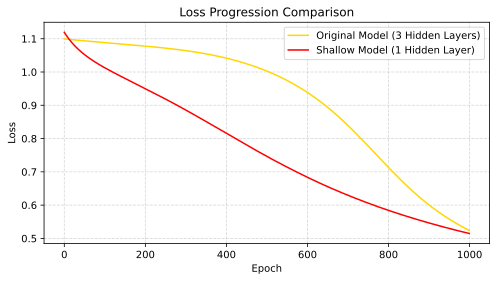

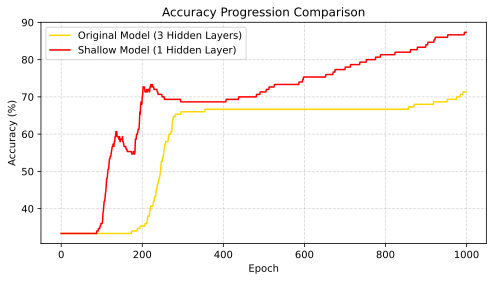

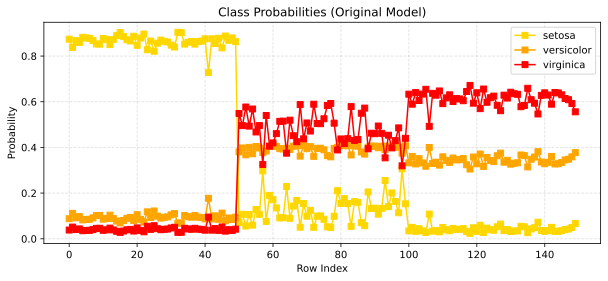

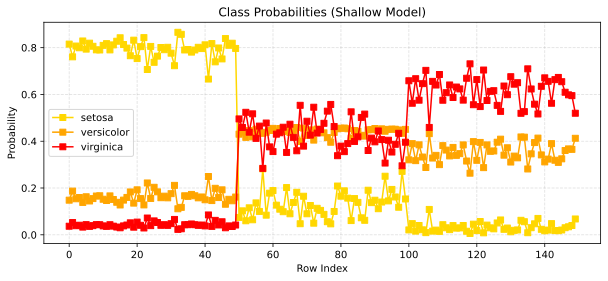

In [21]:
# ============================================================
# ANN Comparison: Original (3 Hidden Layers) vs Shallow (1 Hidden Layer)
# ============================================================

# import libraries
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler

# ============================================================
# Data Preparation
# ============================================================

# fetch dataset
iris = fetch_ucirepo(id=53)

# scale features
scaler = MinMaxScaler()
X = iris.data.features
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = iris.data.targets.copy()
y["class"] = y["class"].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# convert to tensor
data = torch.tensor(X.values).float()
labels = torch.tensor(y.values).float().squeeze().long()

# ============================================================
# Training Function
# ============================================================

def train_model(model, data, labels, lr=0.01, epochs=1000):
    lossfunc = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    losses = torch.zeros(epochs)
    Acc = []

    for i in range(epochs):
        # forward pass
        pred = model(data)
        loss = lossfunc(pred, labels)
        losses[i] = loss

        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # compute accuracy
        matches = torch.argmax(pred, axis=1) == labels
        accuracyPct = 100 * torch.mean(matches.float())
        Acc.append(accuracyPct)

    # final accuracy
    predictions = model(data)
    totalacc = 100 * torch.mean((torch.argmax(predictions, axis=1) == labels).float())

    return losses.detach(), Acc, totalacc, predictions

# ============================================================
# Model 1: Original Architecture (3 Hidden Layers)
# ============================================================

ANN_model_orig = nn.Sequential(
    nn.Linear(4,16), nn.ReLU(),
    nn.Linear(16,16), nn.ReLU(),
    nn.Linear(16,16), nn.ReLU(),
    nn.Linear(16,3)
)

losses_orig, acc_orig, totalacc_orig, pred_orig = train_model(ANN_model_orig, data, labels)
print(f"Original Model Final Accuracy: {totalacc_orig:.2f}%")

# ============================================================
# Model 2: Reduced Architecture (1 Hidden Layer)
# ============================================================

ANN_model_shallow = nn.Sequential(
    nn.Linear(4,16), nn.ReLU(),
    nn.Linear(16,3)
)

losses_shallow, acc_shallow, totalacc_shallow, pred_shallow = train_model(ANN_model_shallow, data, labels)
print(f"Shallow Model Final Accuracy: {totalacc_shallow:.2f}%")

# ============================================================
# Visualization: Loss and Accuracy Comparisons
# ============================================================

# Plot Loss Comparison
plt.figure(figsize=(8,4))
plt.plot(losses_orig, color='gold', label='Original Model (3 Hidden Layers)')
plt.plot(losses_shallow, color='red', label='Shallow Model (1 Hidden Layer)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Progression Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Plot Accuracy Comparison
plt.figure(figsize=(8,4))
plt.plot(acc_orig, color='gold', label='Original Model (3 Hidden Layers)')
plt.plot(acc_shallow, color='red', label='Shallow Model (1 Hidden Layer)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Progression Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# ============================================================
# Probability Visualization for Each Model
# ============================================================

sm = nn.Softmax(dim=1)

# --- Original Model ---
plt.figure(figsize=(10,4))
probs_orig = sm(pred_orig.detach())
plt.plot(probs_orig[:,0], color='gold', linestyle='-', marker='s', label='setosa')
plt.plot(probs_orig[:,1], color='orange', linestyle='-', marker='s', label='versicolor')
plt.plot(probs_orig[:,2], color='red', linestyle='-', marker='s', label='virginica')
plt.xlabel('Row Index')
plt.ylabel('Probability')
plt.title('Class Probabilities (Original Model)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# --- Shallow Model ---
plt.figure(figsize=(10,4))
probs_shallow = sm(pred_shallow.detach())
plt.plot(probs_shallow[:,0], color='gold', linestyle='-', marker='s', label='setosa')
plt.plot(probs_shallow[:,1], color='orange', linestyle='-', marker='s', label='versicolor')
plt.plot(probs_shallow[:,2], color='red', linestyle='-', marker='s', label='virginica')
plt.xlabel('Row Index')
plt.ylabel('Probability')
plt.title('Class Probabilities (Shallow Model)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


#Experiment 2

/tmp/ipython-input-682644464.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y["class"] = y["class"].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})


Original Model Final Accuracy: 77.33%
Shallow Model Final Accuracy: 88.67%


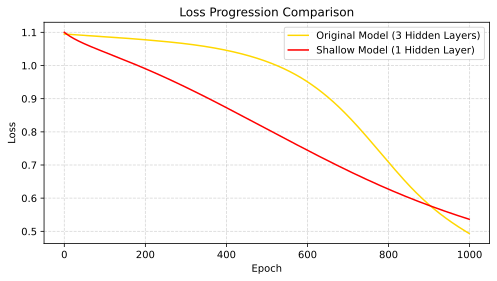

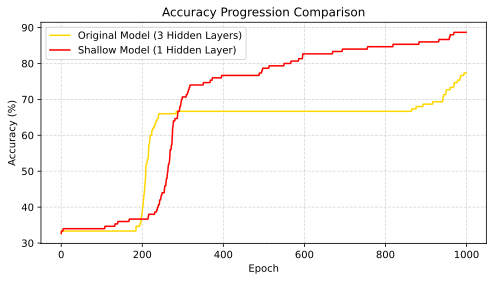

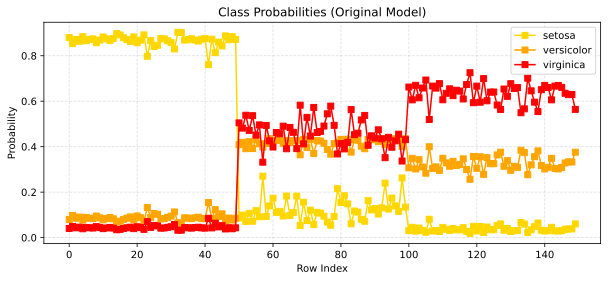

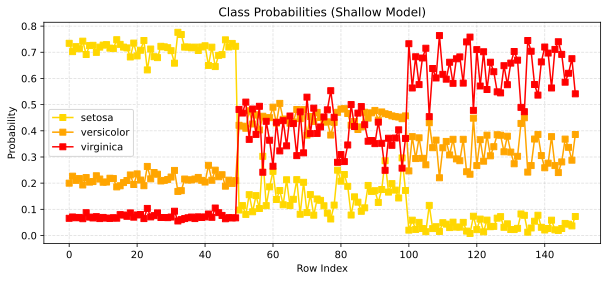

In [18]:
# ============================================================
# ANN Comparison: Original (3 Hidden Layers - 16 units each) vs Shallow (1 Hidden Layer - 32 units)
# ============================================================

# import libraries
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler

# ============================================================
# Data Preparation
# ============================================================

# fetch dataset
iris = fetch_ucirepo(id=53)

# scale features
scaler = MinMaxScaler()
X = iris.data.features
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = iris.data.targets.copy()
y["class"] = y["class"].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# convert to tensor
data = torch.tensor(X.values).float()
labels = torch.tensor(y.values).float().squeeze().long()

# ============================================================
# Training Function
# ============================================================

def train_model(model, data, labels, lr=0.01, epochs=1000):
    lossfunc = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    losses = torch.zeros(epochs)
    Acc = []

    for i in range(epochs):
        # forward pass
        pred = model(data)
        loss = lossfunc(pred, labels)
        losses[i] = loss

        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # compute accuracy
        matches = torch.argmax(pred, axis=1) == labels
        accuracyPct = 100 * torch.mean(matches.float())
        Acc.append(accuracyPct)

    # final accuracy
    predictions = model(data)
    totalacc = 100 * torch.mean((torch.argmax(predictions, axis=1) == labels).float())

    return losses.detach(), Acc, totalacc, predictions

# ============================================================
# Model 1: Original Architecture (3 Hidden Layers)
# ============================================================

ANN_model_orig = nn.Sequential(
    nn.Linear(4,16), nn.ReLU(),
    nn.Linear(16,16), nn.ReLU(),
    nn.Linear(16,16), nn.ReLU(),
    nn.Linear(16,3)
)

losses_orig, acc_orig, totalacc_orig, pred_orig = train_model(ANN_model_orig, data, labels)
print(f"Original Model Final Accuracy: {totalacc_orig:.2f}%")

# ============================================================
# Model 2: Reduced Architecture (1 Hidden Layer)
# ============================================================

ANN_model_shallow = nn.Sequential(
    nn.Linear(4,32), nn.ReLU(),
    nn.Linear(32,3)
)

losses_shallow, acc_shallow, totalacc_shallow, pred_shallow = train_model(ANN_model_shallow, data, labels)
print(f"Shallow Model Final Accuracy: {totalacc_shallow:.2f}%")

# ============================================================
# Visualization: Loss and Accuracy Comparisons
# ============================================================

# Plot Loss Comparison
plt.figure(figsize=(8,4))
plt.plot(losses_orig, color='gold', label='Original Model (3 Hidden Layers)')
plt.plot(losses_shallow, color='red', label='Shallow Model (1 Hidden Layer)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Progression Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Plot Accuracy Comparison
plt.figure(figsize=(8,4))
plt.plot(acc_orig, color='gold', label='Original Model (3 Hidden Layers)')
plt.plot(acc_shallow, color='red', label='Shallow Model (1 Hidden Layer)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Progression Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# ============================================================
# Probability Visualization for Each Model
# ============================================================

sm = nn.Softmax(dim=1)

# --- Original Model ---
plt.figure(figsize=(10,4))
probs_orig = sm(pred_orig.detach())
plt.plot(probs_orig[:,0], color='gold', linestyle='-', marker='s', label='setosa')
plt.plot(probs_orig[:,1], color='orange', linestyle='-', marker='s', label='versicolor')
plt.plot(probs_orig[:,2], color='red', linestyle='-', marker='s', label='virginica')
plt.xlabel('Row Index')
plt.ylabel('Probability')
plt.title('Class Probabilities (Original Model)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# --- Shallow Model ---
plt.figure(figsize=(10,4))
probs_shallow = sm(pred_shallow.detach())
plt.plot(probs_shallow[:,0], color='gold', linestyle='-', marker='s', label='setosa')
plt.plot(probs_shallow[:,1], color='orange', linestyle='-', marker='s', label='versicolor')
plt.plot(probs_shallow[:,2], color='red', linestyle='-', marker='s', label='virginica')
plt.xlabel('Row Index')
plt.ylabel('Probability')
plt.title('Class Probabilities (Shallow Model)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


#Experiment 4

/tmp/ipython-input-2886742463.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y["class"] = y["class"].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})


Original Model Final Accuracy: 72.00%
Shallow Model Final Accuracy: 40.67%


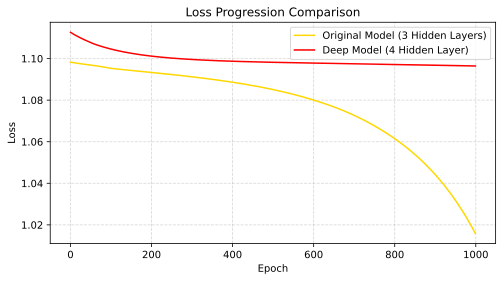

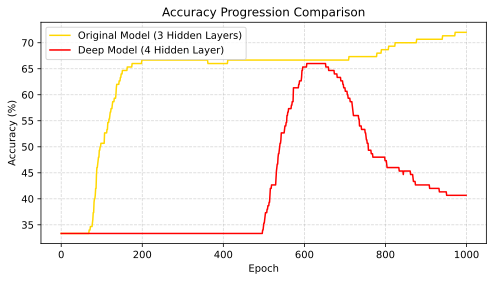

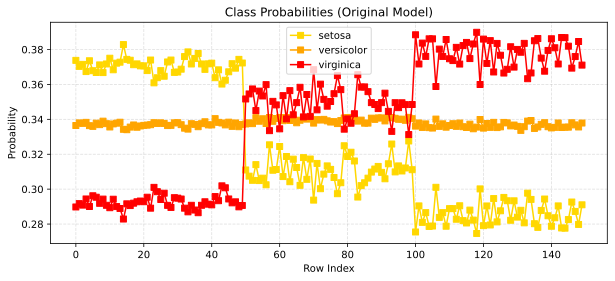

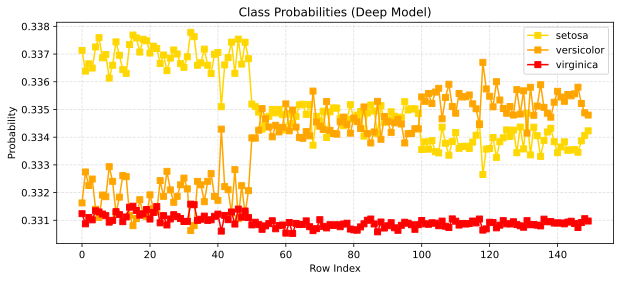

In [24]:
# ============================================================
# ANN Comparison: Original (3 Hidden Layers) vs Deep (4 Hidden Layer)
# ============================================================

# import libraries
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler

# ============================================================
# Data Preparation
# ============================================================

# fetch dataset
iris = fetch_ucirepo(id=53)

# scale features
scaler = MinMaxScaler()
X = iris.data.features
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = iris.data.targets.copy()
y["class"] = y["class"].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# convert to tensor
data = torch.tensor(X.values).float()
labels = torch.tensor(y.values).float().squeeze().long()

# ============================================================
# Training Function
# ============================================================

def train_model(model, data, labels, lr=0.01, epochs=1000):
    lossfunc = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    losses = torch.zeros(epochs)
    Acc = []

    for i in range(epochs):
        # forward pass
        pred = model(data)
        loss = lossfunc(pred, labels)
        losses[i] = loss

        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # compute accuracy
        matches = torch.argmax(pred, axis=1) == labels
        accuracyPct = 100 * torch.mean(matches.float())
        Acc.append(accuracyPct)

    # final accuracy
    predictions = model(data)
    totalacc = 100 * torch.mean((torch.argmax(predictions, axis=1) == labels).float())

    return losses.detach(), Acc, totalacc, predictions

# ============================================================
# Model 1: Original Architecture (3 Hidden Layers)
# ============================================================

ANN_model_orig = nn.Sequential(
    nn.Linear(4,16), nn.ReLU(),
    nn.Linear(16,16), nn.ReLU(),
    nn.Linear(16,16), nn.ReLU(),
    nn.Linear(16,3)
)

losses_orig, acc_orig, totalacc_orig, pred_orig = train_model(ANN_model_orig, data, labels)
print(f"Original Model Final Accuracy: {totalacc_orig:.2f}%")

# ============================================================
# Model 2: Increased Architecture (4 Hidden Layer)
# ============================================================

ANN_model_deep = nn.Sequential(
    nn.Linear(4,16), nn.ReLU(),
    nn.Linear(16,16), nn.ReLU(),
    nn.Linear(16,16), nn.ReLU(),
    nn.Linear(16,16), nn.ReLU(),
    nn.Linear(16,3)
)

losses_shallow, acc_shallow, totalacc_shallow, pred_shallow = train_model(ANN_model_deep, data, labels)
print(f"Shallow Model Final Accuracy: {totalacc_shallow:.2f}%")

# ============================================================
# Visualization: Loss and Accuracy Comparisons
# ============================================================

# Plot Loss Comparison
plt.figure(figsize=(8,4))
plt.plot(losses_orig, color='gold', label='Original Model (3 Hidden Layers)')
plt.plot(losses_shallow, color='red', label='Deep Model (4 Hidden Layer)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Progression Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Plot Accuracy Comparison
plt.figure(figsize=(8,4))
plt.plot(acc_orig, color='gold', label='Original Model (3 Hidden Layers)')
plt.plot(acc_shallow, color='red', label='Deep Model (4 Hidden Layer)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Progression Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# ============================================================
# Probability Visualization for Each Model
# ============================================================

sm = nn.Softmax(dim=1)

# --- Original Model ---
plt.figure(figsize=(10,4))
probs_orig = sm(pred_orig.detach())
plt.plot(probs_orig[:,0], color='gold', linestyle='-', marker='s', label='setosa')
plt.plot(probs_orig[:,1], color='orange', linestyle='-', marker='s', label='versicolor')
plt.plot(probs_orig[:,2], color='red', linestyle='-', marker='s', label='virginica')
plt.xlabel('Row Index')
plt.ylabel('Probability')
plt.title('Class Probabilities (Original Model)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# --- Shallow Model ---
plt.figure(figsize=(10,4))
probs_shallow = sm(pred_shallow.detach())
plt.plot(probs_shallow[:,0], color='gold', linestyle='-', marker='s', label='setosa')
plt.plot(probs_shallow[:,1], color='orange', linestyle='-', marker='s', label='versicolor')
plt.plot(probs_shallow[:,2], color='red', linestyle='-', marker='s', label='virginica')
plt.xlabel('Row Index')
plt.ylabel('Probability')
plt.title('Class Probabilities (Deep Model)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


#Experiment 5

/tmp/ipython-input-3661051248.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y["class"] = y["class"].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})


Original Model Final Accuracy: 69.33%
Shallow Model Final Accuracy: 66.00%


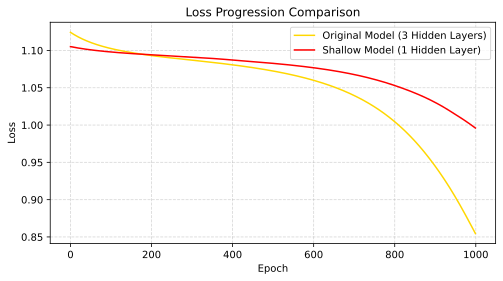

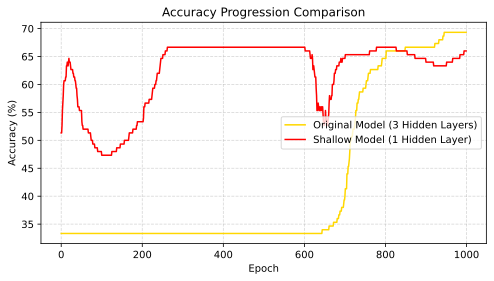

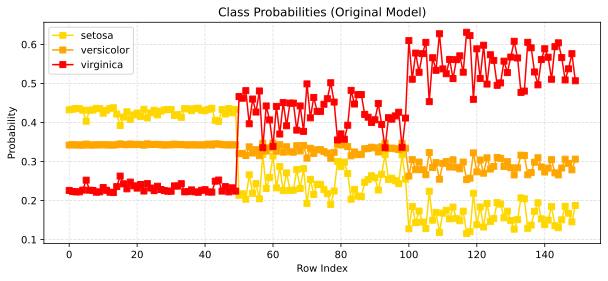

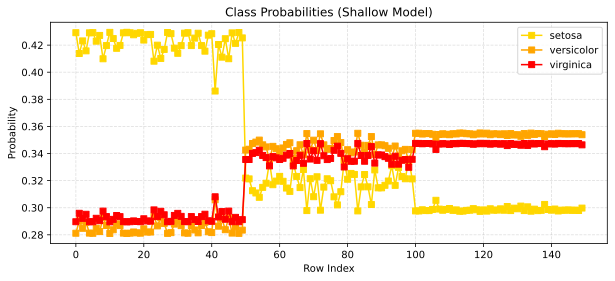

In [25]:
# ============================================================
# ANN Comparison: Original (3 Hidden Layers - 16 units each) vs Shallow (1 Hidden Layer - 32 units)
# ============================================================

# import libraries
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler

# ============================================================
# Data Preparation
# ============================================================

# fetch dataset
iris = fetch_ucirepo(id=53)

# scale features
scaler = MinMaxScaler()
X = iris.data.features
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = iris.data.targets.copy()
y["class"] = y["class"].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# convert to tensor
data = torch.tensor(X.values).float()
labels = torch.tensor(y.values).float().squeeze().long()

# ============================================================
# Training Function
# ============================================================

def train_model(model, data, labels, lr=0.01, epochs=1000):
    lossfunc = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    losses = torch.zeros(epochs)
    Acc = []

    for i in range(epochs):
        # forward pass
        pred = model(data)
        loss = lossfunc(pred, labels)
        losses[i] = loss

        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # compute accuracy
        matches = torch.argmax(pred, axis=1) == labels
        accuracyPct = 100 * torch.mean(matches.float())
        Acc.append(accuracyPct)

    # final accuracy
    predictions = model(data)
    totalacc = 100 * torch.mean((torch.argmax(predictions, axis=1) == labels).float())

    return losses.detach(), Acc, totalacc, predictions

# ============================================================
# Model 1: Original Architecture (3 Hidden Layers)
# ============================================================

ANN_model_orig = nn.Sequential(
    nn.Linear(4,16), nn.ReLU(),
    nn.Linear(16,16), nn.ReLU(),
    nn.Linear(16,16), nn.ReLU(),
    nn.Linear(16,3)
)

losses_orig, acc_orig, totalacc_orig, pred_orig = train_model(ANN_model_orig, data, labels)
print(f"Original Model Final Accuracy: {totalacc_orig:.2f}%")

# ============================================================
# Model 2: Reduced Architecture (1 Hidden Layer)
# ============================================================

ANN_model_deep = nn.Sequential(
    nn.Linear(4,8), nn.ReLU(),
    nn.Linear(8,8), nn.ReLU(),
    nn.Linear(8,8), nn.ReLU(),
    nn.Linear(8,8), nn.ReLU(),
    nn.Linear(8,3)
)

losses_shallow, acc_shallow, totalacc_shallow, pred_shallow = train_model(ANN_model_deep, data, labels)
print(f"Shallow Model Final Accuracy: {totalacc_shallow:.2f}%")

# ============================================================
# Visualization: Loss and Accuracy Comparisons
# ============================================================

# Plot Loss Comparison
plt.figure(figsize=(8,4))
plt.plot(losses_orig, color='gold', label='Original Model (3 Hidden Layers)')
plt.plot(losses_shallow, color='red', label='Shallow Model (1 Hidden Layer)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Progression Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Plot Accuracy Comparison
plt.figure(figsize=(8,4))
plt.plot(acc_orig, color='gold', label='Original Model (3 Hidden Layers)')
plt.plot(acc_shallow, color='red', label='Shallow Model (1 Hidden Layer)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Progression Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# ============================================================
# Probability Visualization for Each Model
# ============================================================

sm = nn.Softmax(dim=1)

# --- Original Model ---
plt.figure(figsize=(10,4))
probs_orig = sm(pred_orig.detach())
plt.plot(probs_orig[:,0], color='gold', linestyle='-', marker='s', label='setosa')
plt.plot(probs_orig[:,1], color='orange', linestyle='-', marker='s', label='versicolor')
plt.plot(probs_orig[:,2], color='red', linestyle='-', marker='s', label='virginica')
plt.xlabel('Row Index')
plt.ylabel('Probability')
plt.title('Class Probabilities (Original Model)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# --- Shallow Model ---
plt.figure(figsize=(10,4))
probs_shallow = sm(pred_shallow.detach())
plt.plot(probs_shallow[:,0], color='gold', linestyle='-', marker='s', label='setosa')
plt.plot(probs_shallow[:,1], color='orange', linestyle='-', marker='s', label='versicolor')
plt.plot(probs_shallow[:,2], color='red', linestyle='-', marker='s', label='virginica')
plt.xlabel('Row Index')
plt.ylabel('Probability')
plt.title('Class Probabilities (Shallow Model)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


#Experiment 6

/tmp/ipython-input-763705135.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y["class"] = y["class"].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})


Training model with learning rate = 0.1
Final Accuracy: 98.00%
Training model with learning rate = 0.2
Final Accuracy: 97.33%
Training model with learning rate = 0.3
Final Accuracy: 98.00%
Training model with learning rate = 0.4
Final Accuracy: 98.00%
Training model with learning rate = 0.5
Final Accuracy: 98.67%
Training model with learning rate = 0.6
Final Accuracy: 98.00%
Training model with learning rate = 0.7
Final Accuracy: 66.67%
Training model with learning rate = 0.8
Final Accuracy: 66.67%
Training model with learning rate = 0.9
Final Accuracy: 66.67%


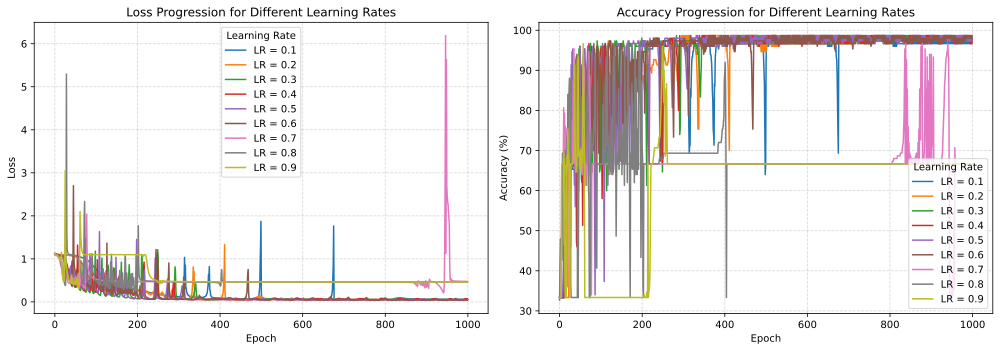

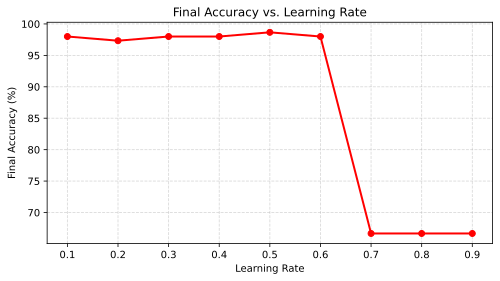

In [35]:
# ============================================================
# ANN: Effect of Learning Rate on Model Accuracy and Loss
# ============================================================

# import libraries
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler

# ============================================================
# Data Preparation
# ============================================================

# fetch dataset
iris = fetch_ucirepo(id=53)

# scale features
scaler = MinMaxScaler()
X = iris.data.features
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = iris.data.targets.copy()
y["class"] = y["class"].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# convert to tensor
data = torch.tensor(X.values).float()
labels = torch.tensor(y.values).float().squeeze().long()

# ============================================================
# Training Function
# ============================================================

def train_model(lr, epochs=1000):
    # model architecture (original: 3 hidden layers)
    model = nn.Sequential(
        nn.Linear(4,16), nn.ReLU(),
        nn.Linear(16,16), nn.ReLU(),
        nn.Linear(16,16), nn.ReLU(),
        nn.Linear(16,3)
    )
    lossfunc = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    losses = torch.zeros(epochs)
    Acc = []

    for i in range(epochs):
        pred = model(data)
        loss = lossfunc(pred, labels)
        losses[i] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        matches = torch.argmax(pred, axis=1) == labels
        accuracyPct = 100 * torch.mean(matches.float())
        Acc.append(accuracyPct.item())

    final_acc = Acc[-1]
    return losses, Acc, final_acc

# ============================================================
# Learning Rate Experiments
# ============================================================

learning_rates = np.arange(0.1, 1.0, 0.1)
results = {}

for lr in learning_rates:
    print(f"Training model with learning rate = {lr:.1f}")
    losses, acc, final_acc = train_model(lr)
    results[lr] = {"loss": losses, "acc": acc, "final_acc": final_acc}
    print(f"Final Accuracy: {final_acc:.2f}%")

# ============================================================
# Visualization 1: Combined Loss and Accuracy Progression
# ============================================================

fig, ax = plt.subplots(1, 2, figsize=(14,5))

# --- Loss subplot
for lr in learning_rates:
    ax[0].plot(results[lr]["loss"].detach(), label=f'LR = {lr:.1f}')
ax[0].set_title('Loss Progression for Different Learning Rates')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(title='Learning Rate')
ax[0].grid(True, linestyle='--', alpha=0.5)

# --- Accuracy subplot
for lr in learning_rates:
    ax[1].plot(results[lr]["acc"], label=f'LR = {lr:.1f}')
ax[1].set_title('Accuracy Progression for Different Learning Rates')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend(title='Learning Rate')
ax[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# ============================================================
# Visualization 2: Final Accuracy vs Learning Rate
# ============================================================

final_accuracies = [results[lr]["final_acc"] for lr in learning_rates]

plt.figure(figsize=(8,4))
plt.plot(learning_rates, final_accuracies, 'o-', color='red', linewidth=2, markersize=6)
plt.xlabel('Learning Rate')
plt.ylabel('Final Accuracy (%)')
plt.title('Final Accuracy vs. Learning Rate')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
